<a href="https://colab.research.google.com/github/kezamamio/CpE-AIML/blob/main/58034_Lab04_TrashTakers/58034_Lab04_TrashTakers/58034_Lab04_TrashTakers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 4 Lab 2: Multiple Linear Regression
$_{\text{©D.J. Lopez | 2021 | Fundamentals of Machine Learning}}$

# Part 1
Create a class named `MultipleLinearRegression()` wherein it can compute for the linear regression for multiple variables. The class will be required to have the following helper methods:
> 1. `correlations(X, y)`
>> input: 2 Rank 2 matrices
>>
>> output: A vector that contains the covariances of each feature to the target. 
> 3. `train(X, y)`
>> input: 2 Rank 2 matrices
>>
>> output: the weights of the linear regressor. Use least squares method for this part. If the training fails due to the singularity of the matrix, raise a custom error pertaining to autocorrelation.
> 4. `predict(x)`
>> input: A testing vector. *Note*: this function should only accept vectors.
>>
>> output: the predicted value. Note: the procedure in solving for the predicted value should be vectorized. Use the concept of matrix multiplication. Do not forget to pad the matrix for the bias term.
> 5. `evaluate()`
>> input: *none*
>>
>> output: a `DataFrame` that displays the SST, SSR, SSE, MSE, RMSE, R-squared, and the Adjusted R-squared. Note: You should use the `predict()` method here.
> 5. `visualize(testX, testY)`
>> input: the dataset training sets and their ground truths.
>>
>> output: a visualization of the linear regressor over the testing dataset. It should be saved as a .jpg file into the running notebook with a dpi of 400.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
## No other packages or libraries can be added in this cell

In [ ]:
### YOUR CODE HERE
class MultipleLinearRegression():

    def __init__(self):
        self.theta = []
        self.model_ = 0        
  
    def concat(self, X):
        shape_X = X.shape[0]
        ones = np.ones(shape=shape_X).reshape(-1,1)
        return np.concatenate((ones, X), 1)

    def help_preds(self, entry):
        beta0 = self.theta[0]
        betas = self.theta[1:]
        prediction = beta0
        for xi, bi in zip(entry, betas): prediction += (bi*xi)
        return prediction

      ## Correlations
    def correlations(self, X, y):
        self.X = X
        self.y = y
        self.X = self.X.T
        X = self.X.to_numpy()
        y = self.y.to_numpy()
        corr1 = np.corrcoef(X,y.flatten())[2,1]
        corr2 = np.corrcoef(X,y.flatten())[0,2]
        correlate = corr1, corr2
        return np.round(correlate, decimals = 2)

  ## Train 
    def train(self, X_train, y_train):
        self.y_train=y_train
        if len(X_train.shape) == 1: self.X_train = X_train.reshape(-1, 1)
        self.X_train = self.concat(X_train)
        self.theta = np.linalg.inv(self.X_train.T @ self.X_train) @ self.X_train.T @ self.y_train
        self.w0 = self.theta[0]
        self.w1 = self.theta[1]
        self.w2 = self.theta[2]
        self.model_ = self.theta.reshape(-1,1)
        return print("w0: ", self.w0, "\nw1: ", self.w1, "\nw2: ", self.w2)

  ## Predict
    def predict(self, test):
        test = test.values
        self.preds = []
        for row in test:
            self.preds.append(self.help_preds(row))
        self.preds = np.asarray(self.preds)
        self.preds = self.preds.reshape(-1,1)
        return self.preds
    
    def evaluate(self):
        self.ytrain=y_train.to_numpy()
        y_hat = self.predict(X_train).reshape(1,-1)
        sst=np.sum(np.square(self.ytrain-self.ytrain.mean()))
        ssr=np.sum(np.square(y_hat-self.ytrain.mean()))
        sse=np.sum(np.square(y_hat-self.ytrain))
        mse=np.mean(np.square(y_hat-self.ytrain))
        rmse=np.sqrt(mse)
        rss=1-sse/sst
        arss=1-(((1-rss)*(self.ytrain.size-1))/(self.ytrain.size-1-1))
        eval_dict ={'Measures of Error':['Sum of Squares Total', 'Sum of Squares Regression',
                                        'Sum of Squares Error', 'Mean Squared Error', 'Root Mean Squared Error',
                                        'R-Squared', 'Adjusted R-Squared'],
                    'Values':[sst,ssr,sse,mse,rmse,rss,arss]
                   }
        df = pd.DataFrame(eval_dict)
        return df

  ## Visualize
    def visualize(self, X_test, y_test):
      X = pd.read_csv("real_estate_price_size_year.csv") 
      y = X['price']
      X = X.drop('price', axis=1)
      X = X.drop('year', axis=1)
      
      x = [1,2,3,4,5]
      y_pred=self.predict(X_test)
      

      plt.figure(1)
      plt.figure(figsize=(7,5), dpi=400) 
      plt.scatter (X,y, color='blue')
      plt.grid()
      plt.title('Ground Truth')
      plt.savefig("groundtruth.jpg")

      plt.figure(2)
      plt.figure(figsize=(7,5), dpi=400) 
      plt.plot(y_test, y_pred, color='red')
      plt.grid()
      plt.title('Predicted')
      plt.savefig("predicted.jpg")
      
      
      plt.show()   

In [ ]:
### Testing Data
### DO NOT DELETE NOR MODIFY THIS CELL
### Data can be retrieved from the git repo
X = pd.read_csv("real_estate_price_size_year.csv") 
y = X['price']
X = X.drop('price', axis=1)
X_train, X_test = X.iloc[0:95], X.iloc[95:]
y_train, y_test = y.iloc[0:95], y.iloc[95:]

In [ ]:
## TEST #1 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor = MultipleLinearRegression()

In [ ]:
## TEST #2 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
R = regressor.correlations(X,y)
R

array([0.09, 0.86])

Expected output value:
$$R = \begin{bmatrix}0.09 & 0.86\end{bmatrix}$$

In [ ]:
## TEST #3 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.train(X_train,y_train)
regressor.model_

w0:  -5964175.033710463 
w1:  232.55743223419742 
w2:  3010.093492351861


array([[-5.96417503e+06],
       [ 2.32557432e+02],
       [ 3.01009349e+03]])

Expected output value:
$$\omega = \begin{bmatrix}\omega_1 \\ \omega_2 \\ \omega_0\end{bmatrix} = \begin{bmatrix}232.56\\ 3010.09 \\ -5964175.03\end{bmatrix}$$

In [ ]:
## TEST #4 (Max pts: 35)
## DO NOT DELETE NOR MODIFY THIS CELL
preds = regressor.predict(X_test)
preds

array([[210962.86866679],
       [324367.17492147],
       [424013.30810178],
       [251928.01112164],
       [238092.94332783]])

Expected output value:
$$\hat{y}_i = \begin{bmatrix} 210962.87 \\ 324367.17 \\ 424013.31 \\ 251928.01 \\ 238092.94 \end{bmatrix}, i = \{0,1,2,3,4\}$$

In [ ]:
# TEST #5 (Max pts: 25)
## DO NOT DELETE NOR MODIFY THIS CELL
model_stats = regressor.evaluate()
model_stats

,Measures of Error,Values
0,Sum of Squares Total,5.726848e+11
1,Sum of Squares Regression,4.467124e+11
2,Sum of Squares Error,1.259723e+11
3,Mean Squared Error,1.326024e+09
4,Root Mean Squared Error,3.641462e+04
5,R-Squared,7.800320e-01
6,Adjusted R-Squared,7.776668e-01


<Figure size 432x288 with 0 Axes>

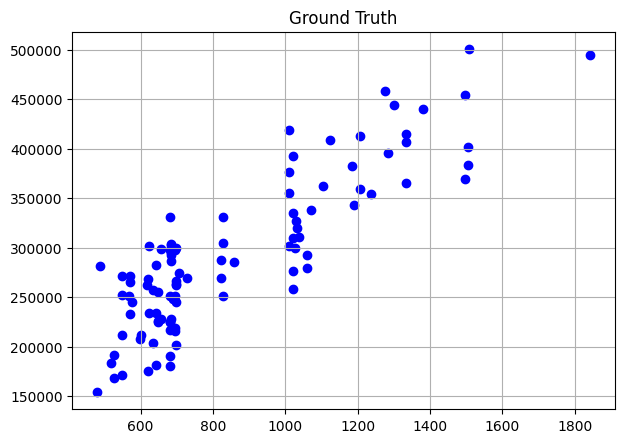

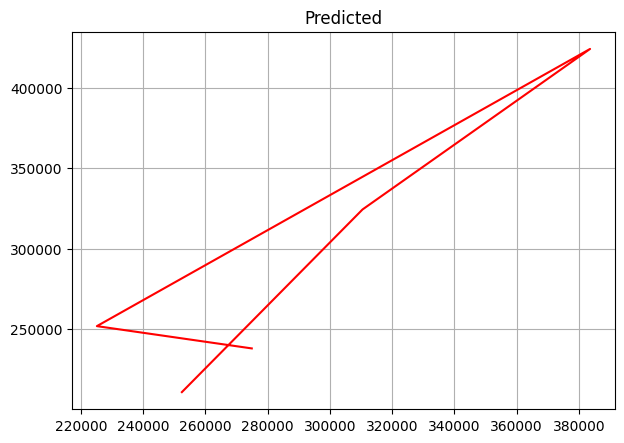

In [ ]:
## TEST #6 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.visualize(X_test, y_test)

# Part 2
## 2.1 Lecture Requirement

Obtain a dataset of your liking from a data source. Explain the purpose of the dataset and mention any publication if it is obtained from the source. Provide a needs statement and significance for the dataset.



TrashTakers Lecture Requirement: [Fire and Theft in Chicago - Purpose, Needs Statement, and Significance](https://drive.google.com/file/d/1-QFT2D3dG-Zgz2YKbTtIhwkE0-DPuE0i/view?usp=sharing)




## 2.2 Lab Requirement

Perform data exploration, data cleaning, and data visualization. The dataset should contain targets either for regression or classification. Provide the correlation and measures of error and variability of the dataset.

# Part 3
## 3.1 Lecture Requirement

Identify an algorithm or method in performing a machine learning activity with the dataset you have chosen. Mention any papers, publications, or white papers about the properties, use, and theory behind the method. Provide an explanation of equations representing the algorithm.



TrashTakers Lecture Requirement: [Linear Regression](https://drive.google.com/file/d/1WOTa2tQFlXnI0T4fbIhxmrcsni2Mg2PU/view?usp=sharing)




## 3.2 Lab Requirement

Present your solution implementing your algorithm of choice. You may use any library or package in this section. However, you are required to observe the following:

* Enforce object-oriented programming by implementing at least two of the pillars of OOP in the entirety of the solution.
* Dedicated functions for training, predicting, and evaluating the solution.
* A DataFrame of the metrics of the solution
* A visualization of the solution’s results.